# Uses Clasification and Regression Tree (CART) to visualize relationships within the datasets

In [53]:
import pandas as pd
import CART_Backend as CART
import importlib
import matplotlib.pyplot as plt
%matplotlib notebook
DataPath = 'C:\\Users\\wesle\\Illisarvik_Processing/Data_Footprints_2018-05-06.csv'
Data = pd.read_csv(DataPath,delimiter = ',',header = 0,na_values = -9999)
Data = Data.set_index(pd.DatetimeIndex(pd.to_datetime(Data['datetime'])))

<IPython.core.display.Javascript object>


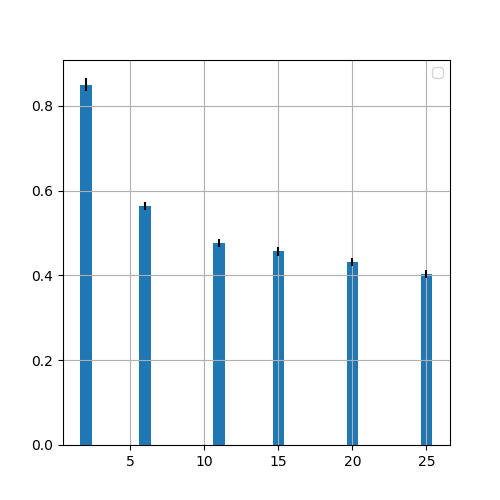

0.85023089844 0.198852984669
0.563709503555 0.137779406354
0.476741351093 0.128632355522
0.456760527918 0.135296311584
0.431055748291 0.126781989184


0.402769856686 0.120976416818
         CI       MSE   N       STD
0  0.014655  0.850231   2  0.198853
1  0.010154  0.563710   6  0.137779
2  0.009480  0.476741  11  0.128632
3  0.009971  0.456761  15  0.135296
4  0.009343  0.431056  20  0.126782
5  0.008916  0.402770  25  0.120976


In [77]:
importlib.reload(CART)
Vars = ['wind_speed','Sedge','Shrub','PPFD_Avg','Temp','AirTC_Avg','u*','air_pressure','VWC','Z_L']
tree = CART.Tree(Data,'fch4',
       Vars)
fig,ax = plt.subplots(1,1,figsize=(5,5))
tree.Validate_Tree(N_Max=30,samp_size=6,ax=ax)
ax.grid()
ax.legend()

<IPython.core.display.Javascript object>


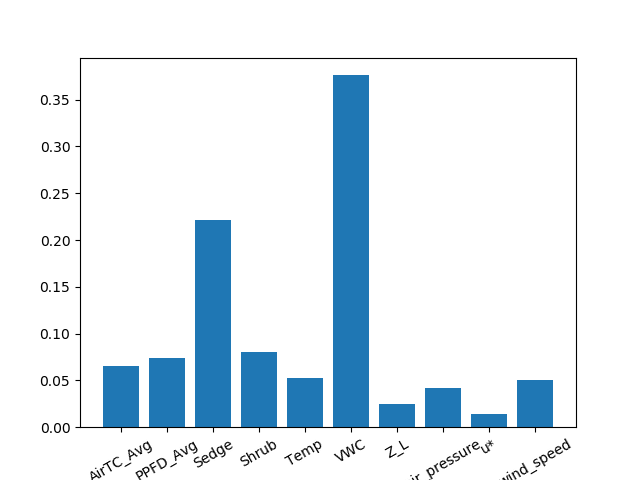

<IPython.core.display.Javascript object>


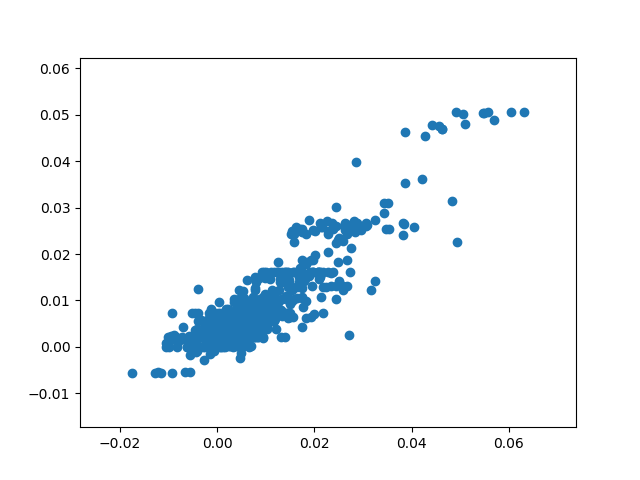

In [81]:
i=-2
plt.figure()
plt.bar(Vars,tree.Features[i])
plt.xticks(rotation=30)
plt.figure()
# plt.scatter(tree.Yfills[i],tree.y)
pred = tree.YScaled.inverse_transform(tree.Yfills[i].reshape(-1,1))
y = tree.YScaled.inverse_transform(tree.y.reshape(-1,1))
plt.scatter(y,pred)